<a href="https://colab.research.google.com/github/ertgrulyksk/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#read data
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [11]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
data = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [14]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

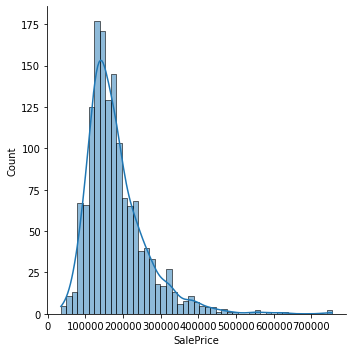

In [15]:
sns.displot(data['SalePrice'], kind='hist', kde=True)

In [16]:
#skewness and kurtosis
print("Skewness: ", data['SalePrice'].skew())
print("Kurtosis: ", data['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.5362818600645305


In [17]:
categorical_variables = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "LotConfig", "Utilities", "LandSlope", "Neighborhood",
                        "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation",
                        "Heating", "CentralAir", "Electrical", "Functional", "GarageType", "GarageFinish", "PavedDrive", "MiscFeature", "SaleType", "SaleCondition",
                        "Fence", "MoSold"]

ordinal_variables = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC",
                    "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]

numerical_variables = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
                      "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars",
                      "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

time_variable = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]

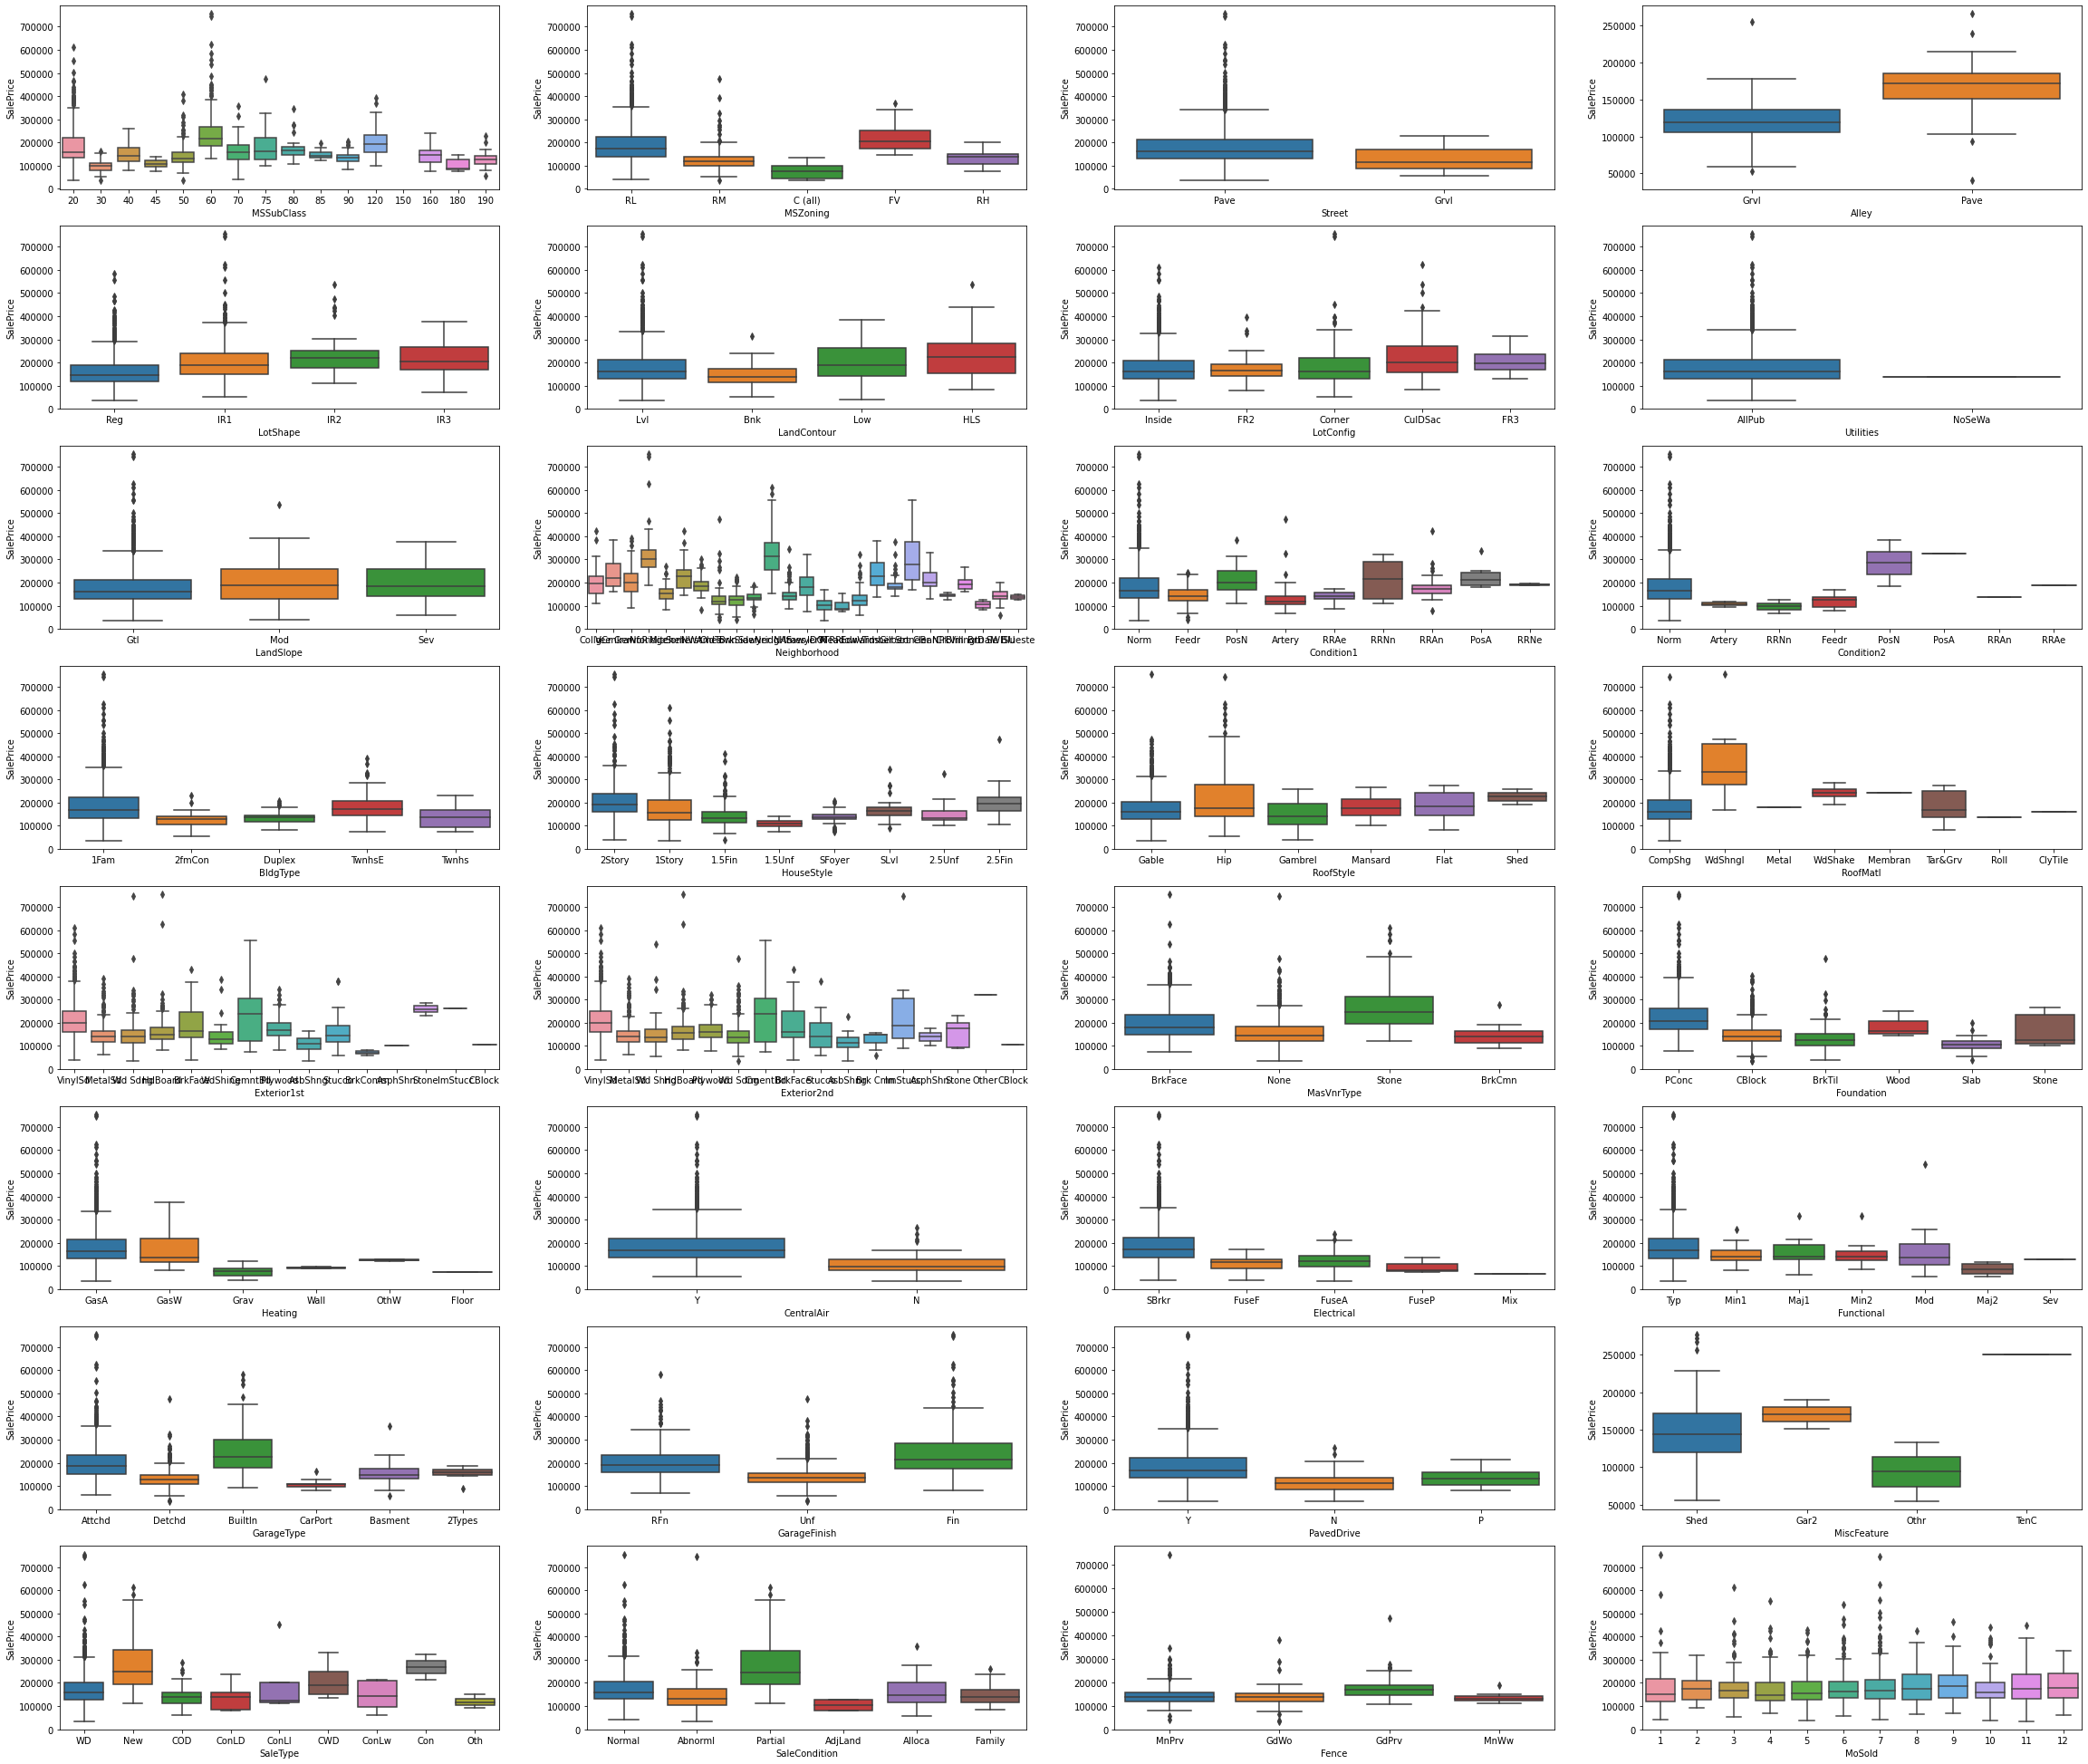

In [18]:
fig, ax = plt.subplots(8, 4, figsize=(40,35))

i=0
for r in range(8):
    for c in range(4):     
        sns.boxplot(ax=ax[r, c], x=categorical_variables[i], y='SalePrice', data=data)
        i+=1
    
plt.show()


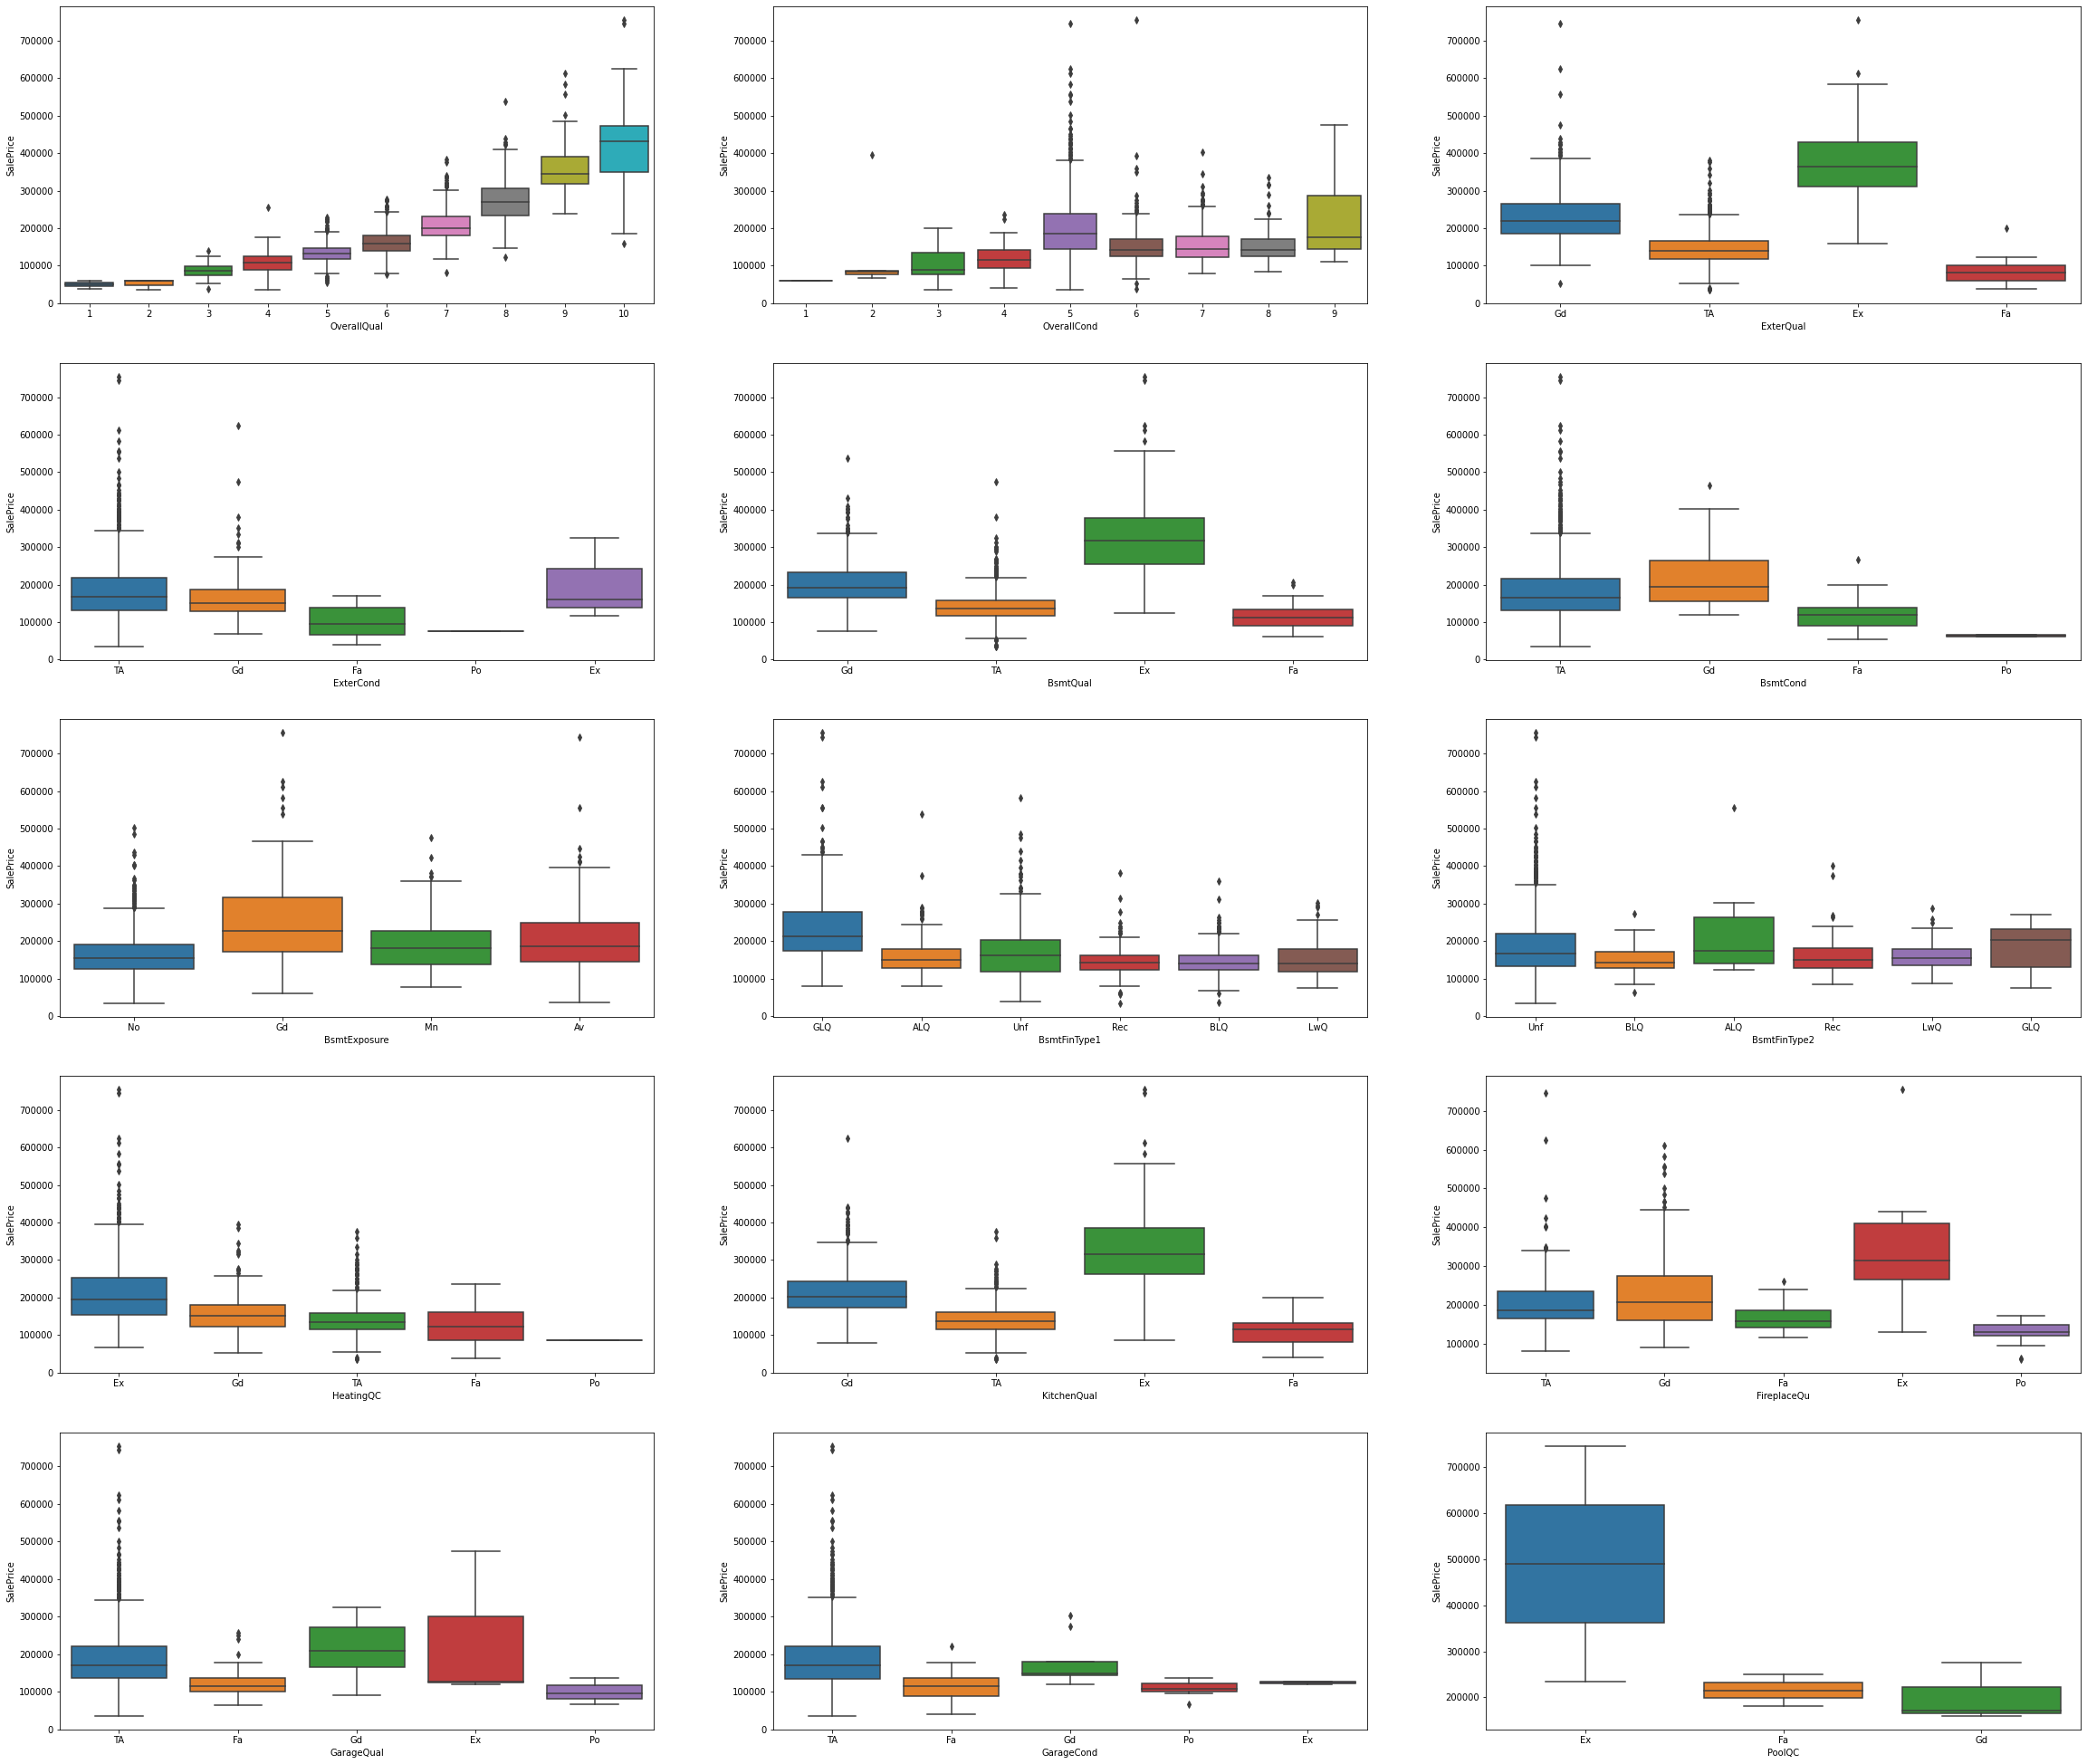

In [19]:
fig, ax = plt.subplots(5, 3, figsize=(40,35))

i=0
for r in range(5):
    for c in range(3):     
        sns.boxplot(ax=ax[r, c], x=ordinal_variables[i], y='SalePrice', data=data)
        i+=1
    
plt.show()

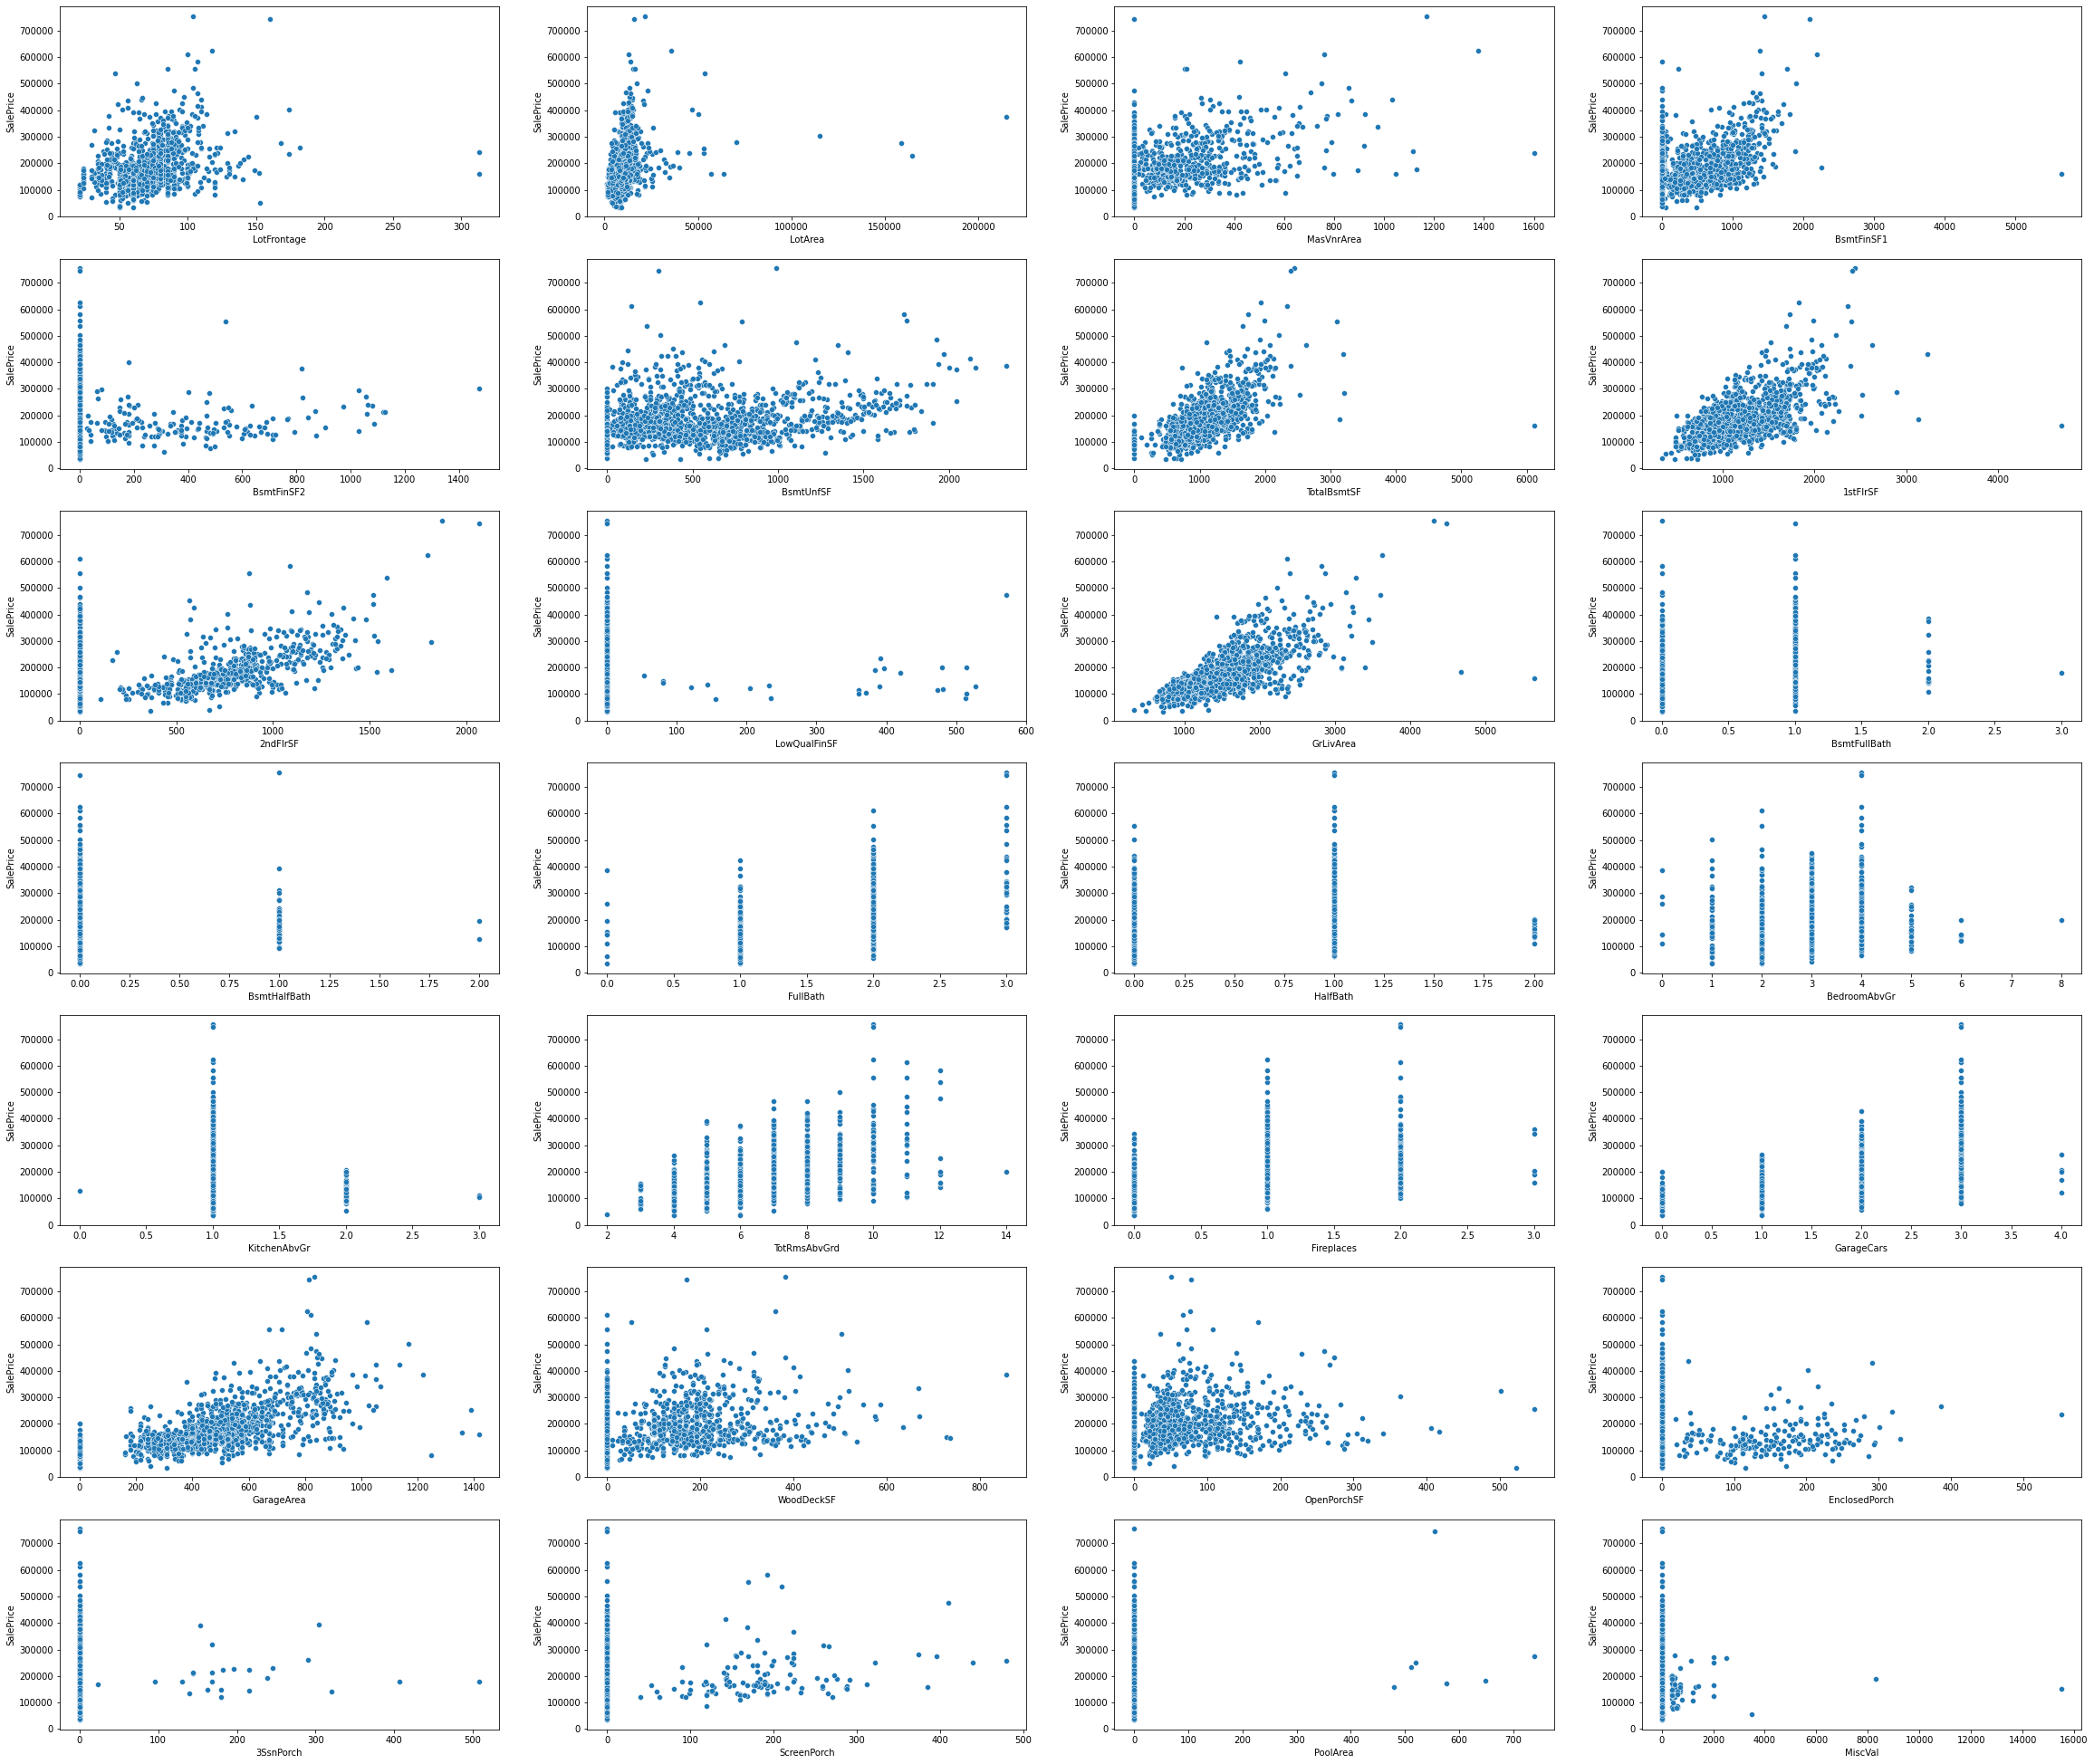

In [20]:
fig, ax = plt.subplots(7, 4, figsize=(40,35))

i=0
for r in range(7):
    for c in range(4):     
        sns.scatterplot(ax=ax[r, c], x=numerical_variables[i], y='SalePrice', data=data)
        i+=1
    
plt.show()

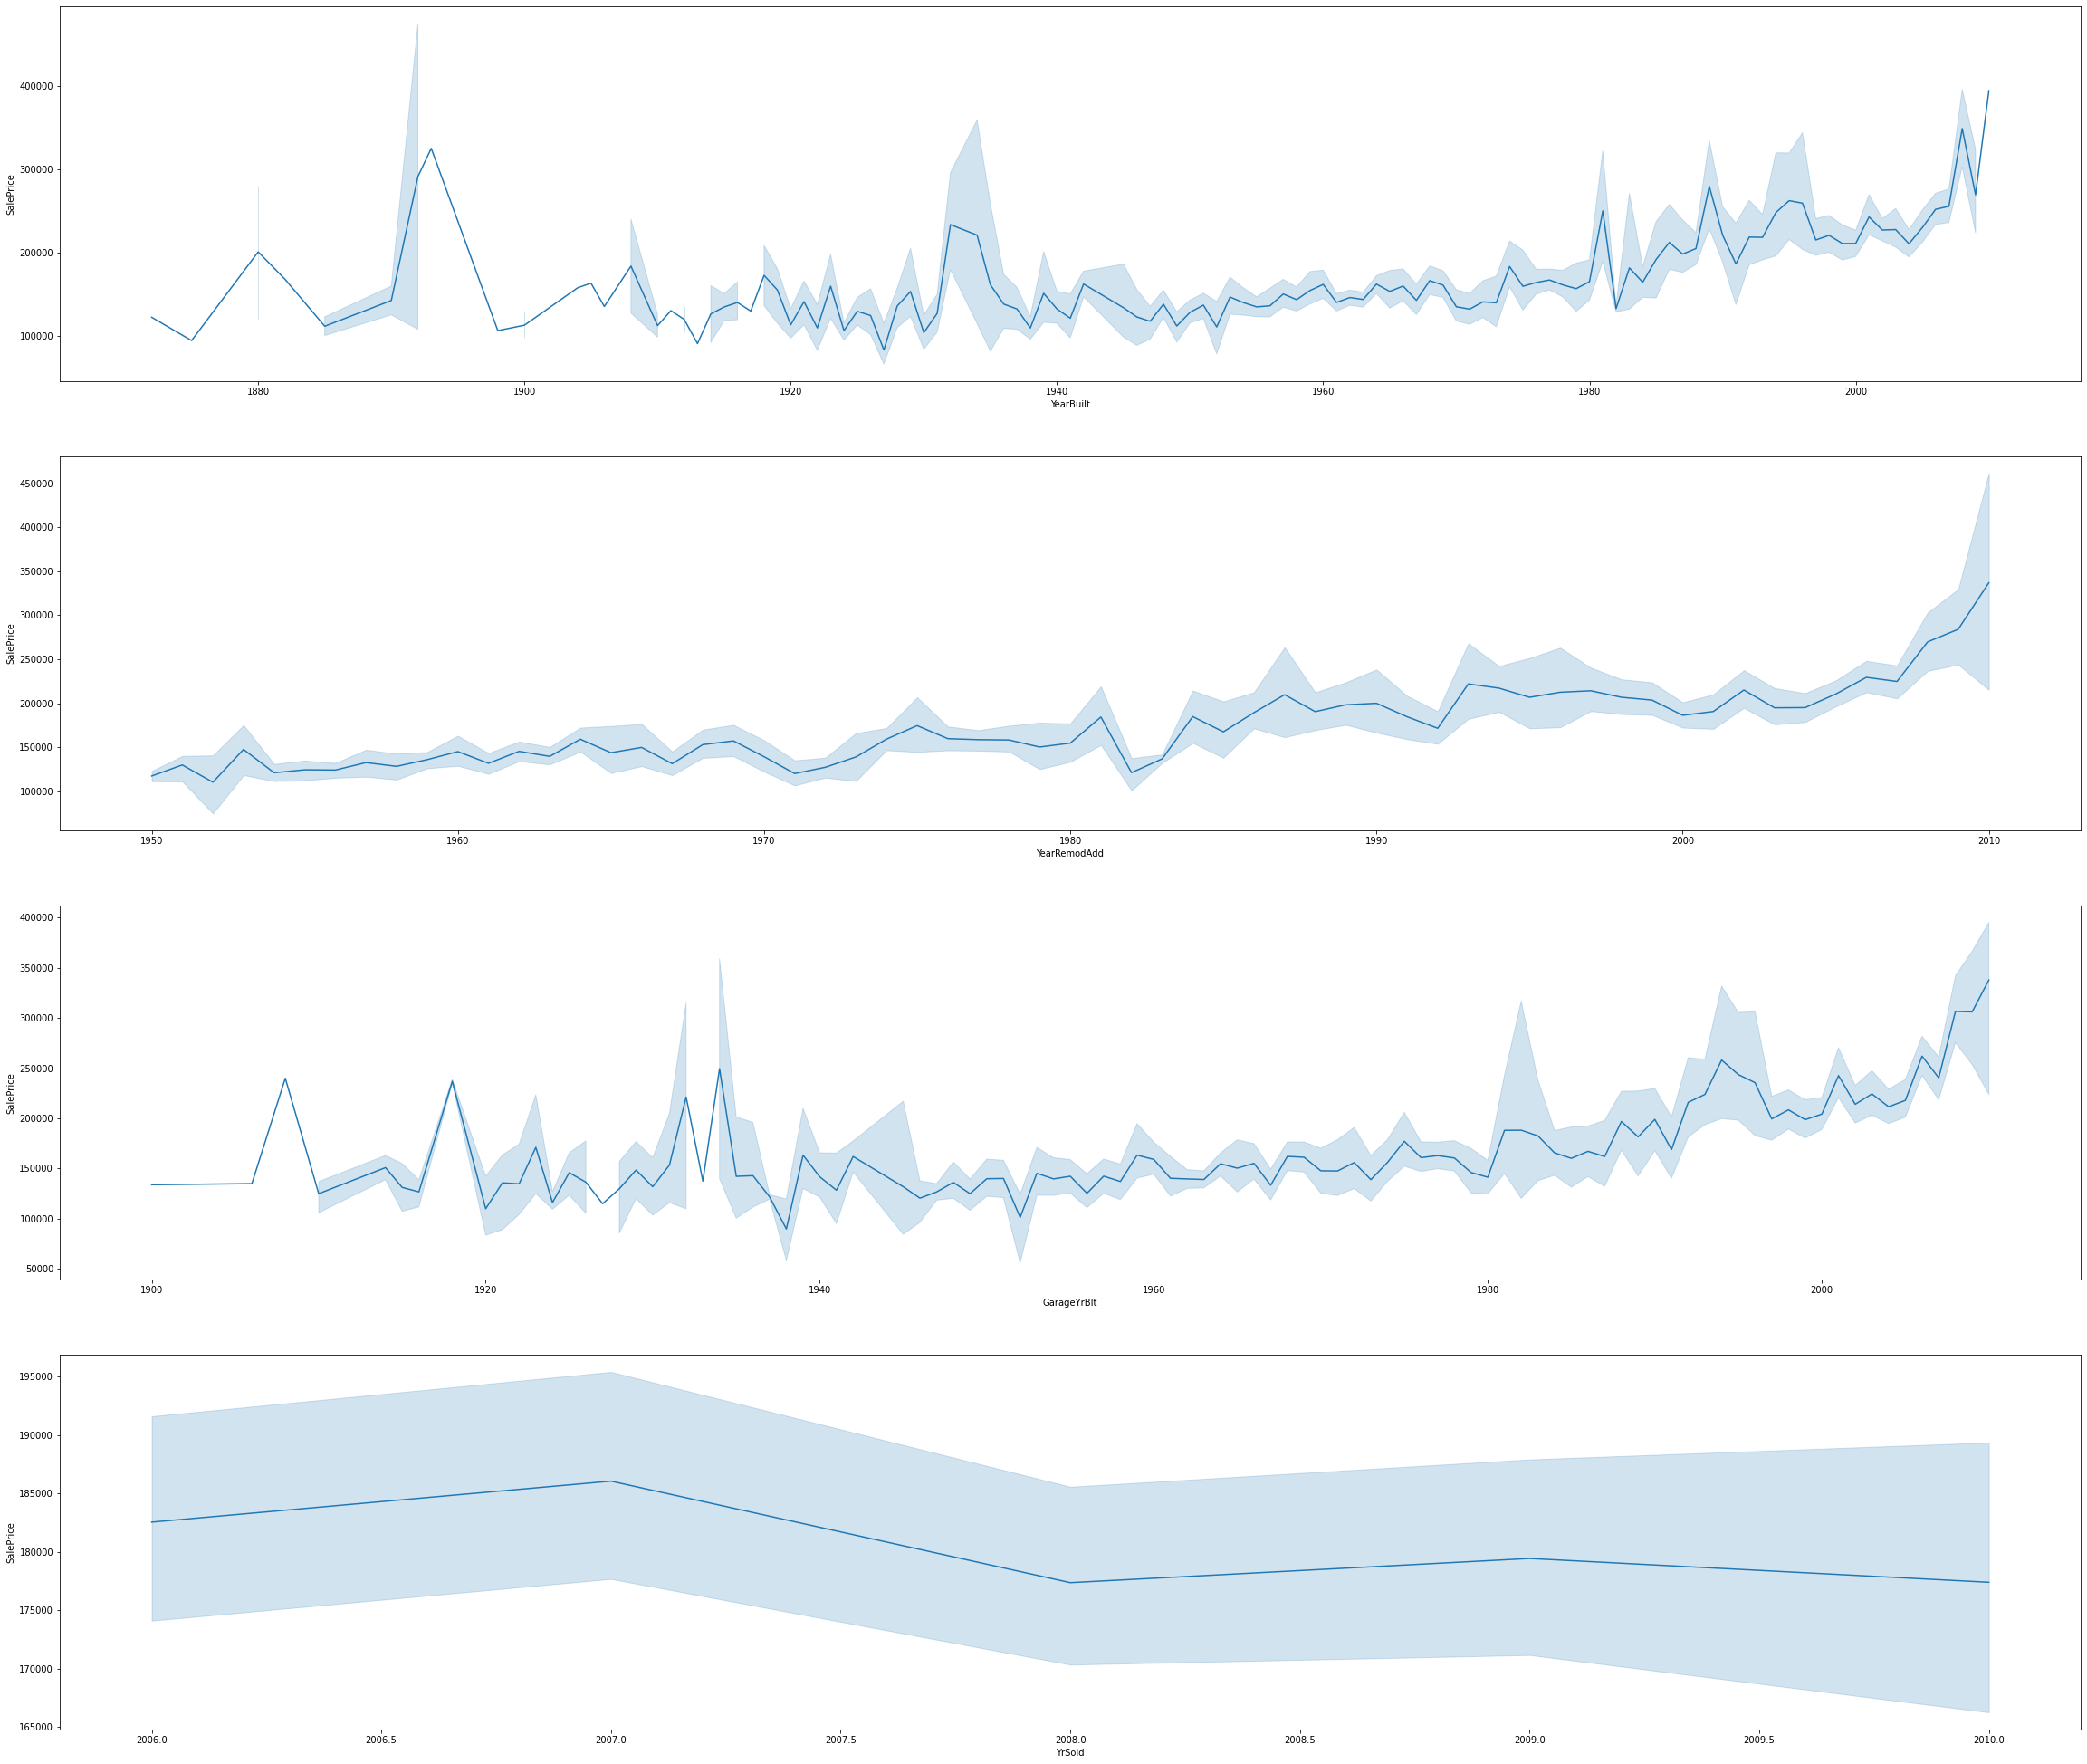

In [21]:
fig, ax = plt.subplots(4, 1, figsize=(40,35))

for r in range(4): 
    sns.lineplot(ax=ax[r], x=time_variable[r], y='SalePrice', data=data)
    
plt.show()

In [22]:
data = data.drop('Id', axis=1)

In [23]:
data['MSZoning'] = data['MSZoning'].fillna(train['MSZoning'].mode()[0])

In [24]:
index_NaN_lotF = list(data["LotFrontage"][data["LotFrontage"].isnull()].index)
lotF = []

for i in index_NaN_lotF:
    
    neighbor = data.loc[i,"Neighborhood"]
    impute_median = train.groupby(["Neighborhood"]).median()['LotFrontage'][neighbor]
    
    data['LotFrontage'].iloc[i] = impute_median

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:
data["Alley"] = data["Alley"].fillna("None")

In [26]:
data = data.drop(['Utilities'], axis=1)

In [27]:
data['Exterior1st'] = data['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])

In [28]:
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

In [29]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

In [30]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

In [31]:
data['Electrical'] = data['Electrical'].fillna(train['Electrical'].mode()[0])

In [32]:
data['KitchenQual'] = data['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

In [33]:
data["Functional"] = data["Functional"].fillna("Typical")

In [34]:
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")

In [35]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')

In [36]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

In [37]:
data["PoolQC"] = data["PoolQC"].fillna("None")

In [38]:
data["Fence"] = data["Fence"].fillna("None")

In [39]:
data["MiscFeature"] = data["MiscFeature"].fillna("None")

In [40]:
data['SaleType'] = data['SaleType'].fillna(train['SaleType'].mode()[0])

In [41]:
data.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 79, dtype: int64

In [42]:
#break the data apart into training and testing
train = data.iloc[:len(train)].copy()
test = data.iloc[len(train):].copy()

#scale target variable seperately to prevent data leakage
train["SalePrice"] = np.log1p(train["SalePrice"])
test["SalePrice"] = np.log1p(test["SalePrice"])

#scale numerical variables too
train[numerical_variables] = np.log1p(train[numerical_variables])
test[numerical_variables] = np.log1p(test[numerical_variables])

In [43]:
data = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,2,2008,WD,Normal,12.247699
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,FR2,Gtl,...,0.0,None,None,None,0.000000,5,2007,WD,Normal,12.109016
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,9,2008,WD,Normal,12.317171
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,Corner,Gtl,...,0.0,None,None,None,0.000000,2,2006,WD,Abnorml,11.849405
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,FR2,Gtl,...,0.0,None,None,None,0.000000,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,3.091042,7.568896,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,6,2006,WD,Normal,NaN
2915,160,RM,3.091042,7.546974,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,4,2006,WD,Abnorml,NaN
2916,20,RL,5.081404,9.903538,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,None,None,0.000000,9,2006,WD,Abnorml,NaN
2917,85,RL,4.143135,9.253591,Pave,None,Reg,Lvl,Inside,Gtl,...,0.0,None,MnPrv,Shed,6.552508,7,2006,WD,Normal,NaN


In [44]:
#change MSSubClass to categorical
data['MSSubClass'] = data['MSSubClass'].apply(str)

#create dummy variables on categorical variables (notice we already removed Utilities)
categorical_variables.remove("Utilities")

cat_variables = data[categorical_variables]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)

data = data.drop(categorical_variables, axis=1)
data = pd.concat([data, cat_dummies], axis=1)

data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,4.189655,9.042040,7,5,2003,2003,5.283204,Gd,TA,Gd,...,1,0,0,0,1,0,0,0,0,1
1,4.394449,9.169623,6,8,1976,1976,0.000000,TA,TA,Gd,...,1,0,0,0,1,0,0,0,0,1
2,4.234107,9.328212,7,5,2001,2002,5.093750,Gd,TA,Gd,...,1,0,0,0,1,0,0,0,0,1
3,4.110874,9.164401,7,5,1915,1970,0.000000,TA,TA,TA,...,1,0,0,0,0,0,0,0,0,1
4,4.442651,9.565284,8,5,2000,2000,5.860786,Gd,TA,Gd,...,1,0,0,0,1,0,0,0,0,1


In [45]:
#define encoding
cat_encoding_1 = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
cat_encoding_2 = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
cat_encoding_3 = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
cat_encoding_4 = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
pool = {'None': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

#encode ordinal variables
data['ExterQual'] = data['ExterQual'].replace(cat_encoding_1)
data['ExterCond'] = data['ExterCond'].replace(cat_encoding_1)

data['BsmtQual'] = data['BsmtQual'].replace(cat_encoding_2)
data['BsmtCond'] = data['BsmtCond'].replace(cat_encoding_2)
data['BsmtExposure'] = data['BsmtExposure'].replace(cat_encoding_3)
data['BsmtFinType1'] = data['BsmtFinType1'].replace(cat_encoding_4)
data['BsmtFinType2'] = data['BsmtFinType2'].replace(cat_encoding_4)

data['HeatingQC'] = data['HeatingQC'].replace(cat_encoding_1)

data['KitchenQual'] = data['KitchenQual'].replace(cat_encoding_1)

data['FireplaceQu'] = data['FireplaceQu'].replace(cat_encoding_2)

data['GarageQual'] = data['GarageQual'].replace(cat_encoding_2)
data['GarageCond'] = data['GarageCond'].replace(cat_encoding_2)

data['PoolQC'] = data['PoolQC'].replace(pool)

data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None
0,4.189655,9.042040,7,5,2003,2003,5.283204,4,3,4,...,1,0,0,0,1,0,0,0,0,1
1,4.394449,9.169623,6,8,1976,1976,0.000000,3,3,4,...,1,0,0,0,1,0,0,0,0,1
2,4.234107,9.328212,7,5,2001,2002,5.093750,4,3,4,...,1,0,0,0,1,0,0,0,0,1
3,4.110874,9.164401,7,5,1915,1970,0.000000,3,3,3,...,1,0,0,0,0,0,0,0,0,1
4,4.442651,9.565284,8,5,2000,2000,5.860786,4,3,4,...,1,0,0,0,1,0,0,0,0,1


In [46]:
#split data back into training and testing dataset
train_data = data.iloc[:len(train)]
test_data = data.iloc[len(train):]

print(train.shape, test.shape)
print(train_data.shape, test_data.shape)

(1460, 79) (1459, 79)
(1460, 231) (1459, 231)


In [47]:
#split training data into X and y
y_train = train_data[['SalePrice']]
X_train = train_data[train_data.columns[train_data.columns!='SalePrice']]

In [48]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost

In [49]:
cv = KFold(n_splits=5)

In [50]:
linear = LinearRegression()

linear_scores = cross_val_score(linear, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# summarize results
print('Accuracy: %.3f (%.3f)' % (np.mean(linear_scores), np.std(linear_scores)))

Accuracy: -0.092 (0.004)


In [51]:
lasso = Lasso()

lasso_grid = {'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02]}

lasso_grid_search = GridSearchCV(lasso, param_grid=lasso_grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error', verbose=1)

lasso_grid_result = lasso_grid_search.fit(X_train,y_train)

lasso_best = lasso_grid_result.best_estimator_

# summarize results
print("Best: %f using %s" % (lasso_grid_result.best_score_, lasso_grid_result.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best: -0.084492 using {'alpha': 0.001}


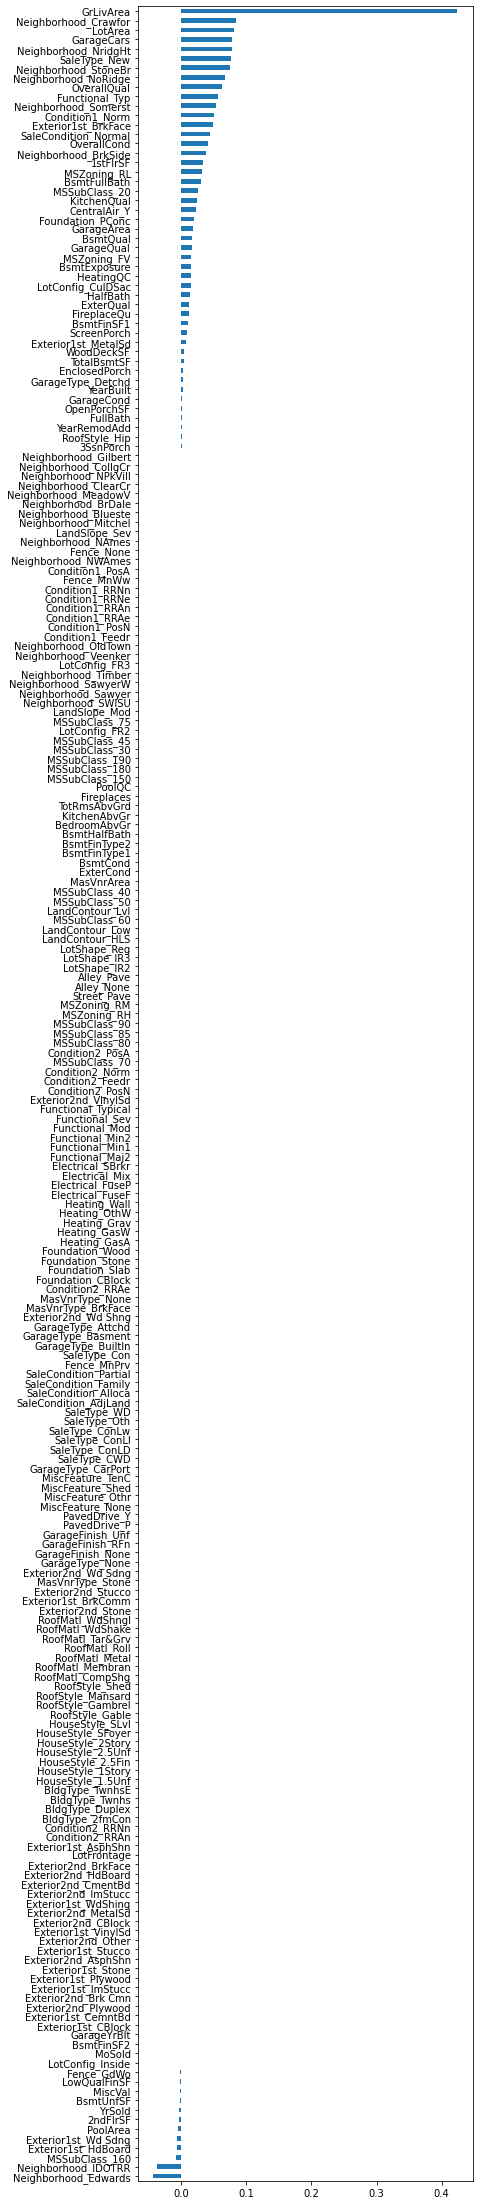

In [52]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
coef = pd.Series(lasso.coef_, index = X_train.columns)

fig, ax = plt.subplots(figsize=(6, 40))
coef.sort_values().plot(kind='barh')

In [53]:
lasso_variables = list(coef[coef!=0].sort_values(ascending=False).index)
X_train_lasso = X_train[lasso_variables]

In [54]:
print(X_train.shape, X_train_lasso.shape)

(1460, 230) (1460, 63)


In [55]:
ridge = Ridge()

ridge_grid = {'alpha':[5, 6, 7, 8, 9, 10]}

ridge_grid_search = GridSearchCV(ridge, param_grid=ridge_grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error', verbose=1)

ridge_grid_result = ridge_grid_search.fit(X_train,y_train)

ridge_best = ridge_grid_result.best_estimator_

# summarize results
print("Best: %f using %s" % (ridge_grid_result.best_score_, ridge_grid_result.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best: -0.085490 using {'alpha': 9}


In [56]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

elastic_grid = {'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02],
               'l1_ratio':[0, 0.25, 0.5, 0.75, 1],
               'max_iter':[10000],
               'tol':[0.01]}

elastic_grid_search = GridSearchCV(elastic, param_grid=elastic_grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error', verbose=1)

elastic_grid_result = elastic_grid_search.fit(X_train,y_train)

elastic_best = elastic_grid_result.best_estimator_

# summarize results
print("Best: %f using %s" % (elastic_grid_result.best_score_, elastic_grid_result.best_params_))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best: -0.084388 using {'alpha': 0.001, 'l1_ratio': 0.75, 'max_iter': 10000, 'tol': 0.01}


In [57]:
import xgboost

xgb = xgboost.XGBRegressor(tree_method = 'gpu_hist')

xgb_grid = {'n_estimators':[1000, 2000],
            'max_depth': [5, 7],
            'eta': [0.1, 0.05, 0.01],
            'subsample': [0.5, 0.7, 1.0],
            'colsample_bytree': [0.5, 0.7, 1.0]}

xgb_grid_search = GridSearchCV(xgb, param_grid=xgb_grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error', verbose=1)

xgb_grid_result = xgb_grid_search.fit(X_train,y_train)

xgb_best = xgb_grid_result.best_estimator_

# summarize results
print("Best: %f using %s" % (xgb_grid_result.best_score_, xgb_grid_result.best_params_))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[20:17:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py", line 391, in fit
    self._Booster = train(params, trainDmatrix,
  File "/usr/local/lib/python3.8/dist-packages/xgboost/training.py", line 212, in train
    return _train_internal(params, dtrain,
  File "/usr/local/lib/python3.8/dist-packages/xgboo

XGBoostError: ignored

In [58]:
#xgboost on all variables
xgb = xgboost.XGBRegressor(n_estimators=2000, max_depth=5, eta=0.01, subsample=0.7, colsample_bytree=0.7, tree_method = 'gpu_hist')

xgb_scores = cross_val_score(xgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print(xgb_scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(xgb_scores), np.std(xgb_scores)))

[nan nan nan nan nan]
Accuracy: nan (nan)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py", line 391, in fit
    self._Booster = train(params, trainDmatrix,
  File "/usr/local/lib/python3.8/dist-packages/xgboost/training.py", line 212, in train
    return _train_internal(params, dtrain,
  File "/usr/local/lib/python3.8/dist-packages/xgboost/tr

In [59]:
#xgboost on lasso variables
xgb = xgboost.XGBRegressor(n_estimators=2000, max_depth=5, eta=0.01, subsample=0.7, colsample_bytree=0.7, tree_method = 'gpu_hist')

xgb_lasso_scores = cross_val_score(xgb, X_train_lasso, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print(xgb_lasso_scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(xgb_lasso_scores), np.std(xgb_lasso_scores)))

[nan nan nan nan nan]
Accuracy: nan (nan)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py", line 391, in fit
    self._Booster = train(params, trainDmatrix,
  File "/usr/local/lib/python3.8/dist-packages/xgboost/training.py", line 212, in train
    return _train_internal(params, dtrain,
  File "/usr/local/lib/python3.8/dist-packages/xgboost/tr

In [60]:
xgb_og = xgboost.XGBRegressor(n_estimators=2000, max_depth=5, eta=0.01, subsample=0.7, colsample_bytree=0.7, tree_method = 'gpu_hist')
xgb_og.fit(X_train, y_train)

xgb_lasso = xgboost.XGBRegressor(n_estimators=2000, max_depth=5, eta=0.01, subsample=0.7, colsample_bytree=0.7, tree_method = 'gpu_hist')
xgb_lasso.fit(X_train_lasso, y_train)

[20:17:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBoostError: ignored

In [61]:
X_test = test_data[test_data.columns[test_data.columns!='SalePrice']]

In [62]:
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge_best.predict(X_test)
elastic_pred = elastic_best.predict(X_test)
xgb_og_pred = xgb_og.predict(X_test)
xgb_lasso_pred = xgb_lasso.predict(X_test[lasso_variables])

XGBoostError: ignored

In [63]:
from sklearn.ensemble import StackingRegressor

estimators = [('lasso', Lasso(alpha=0.001)),
              ('ridge', Ridge(alpha=9)),
              ('elastic', ElasticNet(alpha=0.001, l1_ratio=0.75, max_iter=10000, tol=0.01)),
              ('xgboost', xgboost.XGBRegressor(n_estimators=2000, max_depth=5, eta=0.01, subsample=0.7, colsample_bytree=0.7))]

In [64]:
#stacking regression on all variables
stack = StackingRegressor(estimators=estimators, cv=cv)

stack.fit(X_train, y_train.values.ravel())

stack_pred = stack.predict(X_test)

[20:18:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [65]:
#stacking regression on lasso variables
stack_lasso = StackingRegressor(estimators=estimators, cv=cv)

stack_lasso.fit(X_train_lasso, y_train.values.ravel())

stack_lasso_pred = stack_lasso.predict(X_test[lasso_variables])

[20:19:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [66]:
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission['SalePrice'] = np.expm1(stack_lasso_pred)
submission.to_csv('stack_lasso_submission.csv', index=False)

FileNotFoundError: ignored